In [62]:
import pandas as pd
import matplotlib.pyplot as plt

GAME = "climber"
DIFFICULTY = "easy"
name = f"{GAME}_{DIFFICULTY}"
col_name = f"{GAME}_{200 if DIFFICULTY == 'easy' else 500}_{DIFFICULTY}"

# Specify the file path
df_path = f"./data/{name}.csv"
plot_path = f"./images/{name}.png"

columns = ["play/step", f"{col_name} - play/episodic_reward", f"{col_name} - test/episodic_reward"]

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(df_path, usecols=columns)

In [63]:
df.head()

,play/step,climber_200_easy - play/episodic_reward,climber_200_easy - test/episodic_reward
0,200,NaN,0.0
1,1000,1.0,NaN
2,1200,NaN,0.0
3,1900,NaN,11.0
4,2000,0.0,NaN


In [64]:
# rename columns
df = df.rename(columns={columns[0]: "step", columns[1]: "train_episodic_reward", columns[2]: "test_episodic_reward"})

In [65]:
df.head(-10)

,step,train_episodic_reward,test_episodic_reward
0,200,NaN,0.0
1,1000,1.0,NaN
2,1200,NaN,0.0
3,1900,NaN,11.0
4,2000,0.0,NaN
...,...,...,...
5422,2091800,NaN,2.0
5423,2091805,0.0,NaN
5424,2092800,NaN,0.0
5425,2092805,0.0,NaN


In [66]:
train_df = df[df["train_episodic_reward"].notna()]
test_df = df[df["test_episodic_reward"].notna()]

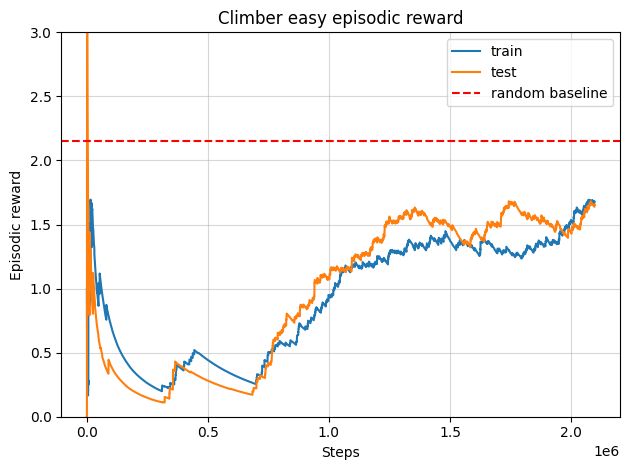

In [67]:
RANDOM_MEAN = {
    "coinrun": 2.4,
    "miner": 1.233,
    "bossfight": 0.036,
    "climber": 2.15,
}

Y_LIMITS = {
    "coinrun": 10,
    "miner": 1.5,
    "bossfight": 1.5,
    "climber": 3,
}

plt.plot(train_df["step"], train_df["train_episodic_reward"].ewm(span=1000).mean())
plt.plot(test_df["step"], test_df["test_episodic_reward"].ewm(span=1000).mean())
plt.axhline(y=RANDOM_MEAN[GAME], color='r', linestyle='--')

plt.xlabel("Steps")
plt.ylabel("Episodic reward")
plt.title(f"{GAME.capitalize()} {DIFFICULTY} episodic reward")
plt.legend(["train", "test", "random baseline"])
plt.ylim(0, Y_LIMITS[GAME])

# add opaque grid
plt.grid(alpha=0.5)

# make the plot nicer
plt.tight_layout()

# save the plot
plt.savefig(plot_path)

plt.show()